# **Numerical Solution of the Schrödinger Equation for the Double Square Well Potential**

**Authors:** Dou Du, Taylor James Baird and Giovanni Pizzi 

<i class="fa fa-home fa-2x"></i><a href="../index.ipynb" style="font-size: 20px"> Go back to index</a>

**Source code:** https://github.com/osscar-org/quantum-mechanics/blob/master/notebook/quantum-mechanics/2quantumwells.ipynb


This notebook displays interactively the eigenfunctions for a double square well potential (DSWP) in one dimension, as obtained from the numerical solution of the associated Schrödinger equation. The double square well
potential is a simple but effective model to describe physical systems.

<hr style="height:1px;border:none;color:#cccccc;background-color:#cccccc;" />

## **Goals**
* Understand one of the numerical methods used to solve the time-independent Schrödinger equation.
* Understand the importance of the DSWP model for real material systems.
* Investigate quantum tunneling in the double square well potential system.

## **Background Theory**

[**More in the background theory.**](./theory/theory_2quantumwells.ipynb)

## **Tasks and exercises**

1. Start from a small gap distance (e.g. 0.1) between the two quantum wells.
Fix the depth and width for both wells to their default values. Keep both wells
identical. Slowly increase (use 0.1 as step value) the gap distance and record 
the two lowest eigenvalues at each gap distance. What do you 
see when the gap distance is increasing? Can you think of a chemical reaction that could be modeled by this process?

    <details>
    <summary style="color: red">Solution</summary>
    <div style="border:blue; border-width:3px; border-style:outset;">
    When the gap distance is increased, the energy difference between 
    the two lowest eigenvalues becomes smaller. When the gap distance becomes significant, 
    the wavefunctions are localized in both quantum wells, which converge 
    to single quantum well solutions. This process models the breaking of an H$_2$ bond.
    </div>
    </details>

2. In the accompanying background theory notebook, we employed symmetric double wells to describe the H$_2$ molecule and ammonia maser examples. This means that the width and depth are identical for both wells. However, it is possible to imagine a situation in which the two wells are different. What kinds of chemical systems can be described by two quantum wells with different depths and widths?

    <details>
    <summary style="color: red">Solution</summary>
    <div style="border:blue; border-width:3px; border-style:outset;">
    Generally, the double square well potential can be employed to characterize diatomic molecules, which only contain two atoms. There are two categories 
    of diatomic molecules, namely homonuclear and heteronuclear molecules. 
    Homonuclear diatomic molecules consist of two identical atoms, 
    such as H$_2$, O$_2$, and N$_2$. Heteronuclear diatomic molecules have 
    two different atoms like CO, NO, and HCl. The symmetric DSWP is a reasonable 
    model for homonuclear diatomic molecules since the electron-nuclear 
    interactions are the same for both nuclei. On the other hand, one needs 
    to set two different quantum wells to approximate heteronuclear 
    diatomic molecules.
    </div>
    </details>

3. What is the disadvantage of this double square well potential model?
How would one improve the model?

    <details>
    <summary style="color: red">Solution</summary>
    <div style="border:blue; border-width:3px; border-style:outset;">
    Even though the DSWP is successful in the explanation of some quantum 
    systems, the model is still too simple to be applied in many cases and is far from the real potential. A more realistic potential should not change value so sharply, but should instead move somewhat smoothly from a finite to zero value.
    One can replace the square well with another, more realistic potential, 
    for example, a quartic function as shown in the 
    <a href="./asymmetricwell.ipynb">"Avoided Crossing 
    in 1D Asymmetric Quantum Well"</a> notebook.
    </div>
    </details>
    
4. By making a comparison with the solutions expected from classical considerations, think of how quantum mechanical tunnelling manifests in this system. Furthermore, try to think of the role this phenomenon plays in the operation of an ammonia maser.

   <details>
    <summary style="color: red">Solution</summary>
    <div style="border:blue; border-width:3px; border-style:outset;">  
    In the classical picture of this system, one would never expect a particle with energy $E$, smaller than the height of the well, $V$, to be observed in the region between the two wells or to move from its original well to the other. However, we can observe in the figure that in the quantum mechanical treatment of the system, there is in fact a non-zero probability of finding a particle in the region between the two wells and for hopping between wells. This latter behaviour is referred to as tunnelling. This phenomenon is one of the core principles behind an ammonia (NH$_3$) maser which relies on the tunnelling of the nitrogen atom through the potential barrier produced by the plane of hydrogen atoms. See the <a href="./theory/theory_2quantumwells.ipynb">background theory notebook</a> for an illustration of this.
    </div>
    </details>


<hr style="height:1px;border:none;color:#cccccc;background-color:#cccccc;" />

## Interactive visualization
(be patient, it might take a few seconds to load)

In [1]:
%matplotlib widget

from numpy import linspace, sqrt, ones, arange, diag, argsort, zeros
from scipy.linalg import eigh_tridiagonal
import matplotlib.pyplot as plt
from ipywidgets import FloatSlider, jslink, VBox, HBox, Button, Label, RadioButtons

In [2]:
colors = ['#e41a1c','#377eb8','#4daf4a','#984ea3','#ff7f00','#ffff33','#a65628','#f781bf']
ixx = 0

def doublewell_potential(x, width1, depth1, width2, depth2, dist):
    xa = zeros(len(x))
    xb = zeros(len(x))
    
    for i in range(len(x)):
        if x[i] > -dist/2.0 - width1 and x[i] < -dist/2.0:
            xa[i] = depth1

    for i in range(len(x)):
        if x[i] > dist/2.0 and x[i] < dist/2.0 + width2:
            xb[i] = depth2
    
    return xa + xb
            
    
def diagonalization(hquer, L, N, pot = doublewell_potential, width1 = 0.5, depth1 = -0.2,
                     width2 = 0.5, depth2 = -0.2, dist = 1.0):
    """Calculated sorted eigenvalues and eigenfunctions. 

       Input:
         hquer: Planck constant
         L: set viewed interval [-L,L] 
         N: number of grid points i.e. size of the matrix 
         pot: potential function of the form pot
         x0: center of the quantum well
         width: the width of the quantum well
         depth: the depth of the quantum well
       Ouput:
         ew: sorted eigenvalues (array of length N)
         ef: sorted eigenfunctions, ef[:,i] (size N*N)
         x:  grid points (arry of length N)
         dx: grid space
         V:  Potential at positions x (array of length N)
    """
    x = linspace(-L, L, N+2)[1:N+1]               # grid points 
    dx = x[1] - x[0]                              # grid spacing
    V = pot(x, width1, depth1, width2, depth2, dist)
    z = hquer**2 /2.0/dx**2                       # second diagonals

    ew, ef = eigh_tridiagonal(V+2.0*z, -z*ones(N-1))    
    ew = ew.real                                  # real part of the eigenvalues
    ind = argsort(ew)                             # Indizes f. sort. Array
    ew = ew[ind]                                  # Sort the ew by ind
    ef = ef[:, ind]                               # Sort the columns

    ef = ef/sqrt(dx)                              # Correct standardization 
    return ew, ef, x, dx, V


def plot_eigenfunctions(ax, ew, ef, x, V, width=1, Emax=0.05, fak=2.0, single = 0):
    """Plot of the lowest eigenfunctions 'ef' in the potential 'V (x)'
       at the level of the eigenvalues 'ew' in the plot area 'ax'.
    """
    
    if psi_x.value == "Wavefunction":
        y_text = r'$V(x)$ and $\psi(x)$'
        fig.suptitle('Numerical Solution ($\psi$) of One Dimension Schrödinger Equation', fontsize = 13)
    else:
        y_text = r'$V(x)$ and $|\psi(x)|^2$'
        fig.suptitle('Numerical Solution ($\psi^2$) of One Dimension Schrödinger Equation', fontsize = 13)
    
    fak = fak/100.0;
    
    ax[0].axhspan(0.0, Emax, facecolor='lightgrey')
    
    ax[0].set_xlim([min(x), max(x)])
    ax[0].set_ylim([min(V)-0.05, Emax])
    
    ax[0].set_xlabel(r'$x/a$', fontsize = 10)
    ax[0].set_ylabel(y_text, fontsize = 10)
    
    ax[1].set_xlim([min(x), max(x)])
    ax[1].set_ylim([min(V)-0.05, Emax])
    
    ax[1].yaxis.set_label_position("right")
    ax[1].yaxis.tick_right()
    
    ax[1].get_xaxis().set_visible(False)
    ax[1].set_ylabel(r'$\rm{\ Eigenvalues}$', fontsize = 10)
    
    indmax = sum(ew<=0.0)                         
    if not hasattr(width, "__iter__"):           
        width = width*ones(indmax)               
    for i in arange(indmax):
        if psi_x.value == "Wavefunction":
            ax[0].plot(x, fak*(ef[:, i])+ew[i], linewidth=width[i]+.1, color=colors[i%len(colors)])
        else:
            ax[0].plot(x, fak*abs(ef[:, i])**2+ew[i], linewidth=width[i]+.1, color=colors[i%len(colors)])

        ax[1].plot(x, x*0.0+ew[i], linewidth=width[i]+2.5, color=colors[i%len(colors)])
        
    ax[0].plot(x, V, c='k', linewidth=1.6)

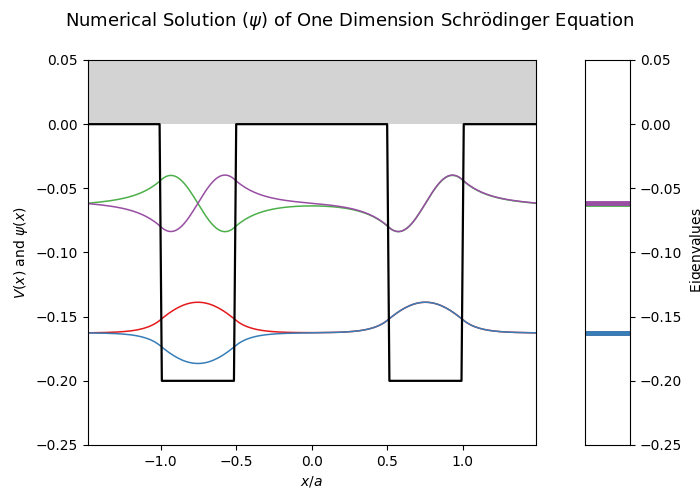

In [3]:
L = 1.5                                              # x range [-L,L]
N = 200                                              # Number of grid points 
hquer = 0.06                                         # Planck constant
sigma_x = 0.1                                        # Width of the Guassian function
zeiten = linspace(0.0, 10.0, 400)                    # Time

style = {'description_width': 'initial'}

swidth1 = FloatSlider(value = 0.5, min = 0.1, max = 1.0, description = 'Width (left): ', style = style)
sdepth1 = FloatSlider(value = -0.2, min = -1.0, max = -0.1, description = 'Depth (left): ', style = style)

swidth2 = FloatSlider(value = 0.5, min = 0.1, max = 1.0, description = 'Width (right): ', style = style)
sdepth2 = FloatSlider(value = -0.2, min = -1.0, max = -0.1, description = 'Depth (right): ', style = style)

sdist = FloatSlider(value = 0.5, min = 0.0, max = L, description = r'Gap distance: ', style = style)
sfak = FloatSlider(value = 2, min = 1.0, max = 5.0, step = 0.5, description = r'Zoom factor: ', style = style)

psi_x = RadioButtons(options=["Wavefunction", "Probability density"], value="Wavefunction", description="Show:")

ew, ef, x, dx, V = diagonalization(hquer, L, N)
    
fig, ax = plt.subplots(1, 2, figsize=(7,5), gridspec_kw={'width_ratios': [10, 1]})
fig.canvas.header_visible = False
fig.canvas.layout.width = "750px"

fig.canvas.header_visible = False
plot_eigenfunctions(ax, ew, ef, x, V)

plt.show()

def on_width_change1(change):
    global ew, ef, x, dx, V
    
    try:
        ann.remove()
        ann1.remove()
    except:
        pass
    
    ax[0].clear()
    ax[1].clear()
    ew, ef, x, dx, V = diagonalization(hquer, L, N, 
                                        width1 = swidth1.value, depth1 = sdepth1.value,
                                        width2 = swidth2.value, depth2 = sdepth2.value,
                                        dist = sdist.value)
    plot_eigenfunctions(ax, ew, ef, x, V)

def on_depth_change1(change):
    global ew, ef, x, dx, V
       
    try:
        ann.remove()
        ann1.remove()
    except:
        pass
    
    ax[0].clear()
    ax[1].clear()
    ew, ef, x, dx, V = diagonalization(hquer, L, N, 
                                        width1 = swidth1.value, depth1 = sdepth1.value,
                                        width2 = swidth2.value, depth2 = sdepth2.value,
                                        dist = sdist.value)
    plot_eigenfunctions(ax, ew, ef, x, V)
    

def on_width_change2(change):
    global ew, ef, x, dx, V
    
    try:
        ann.remove()
        ann1.remove()
    except:
        pass
    
    ax[0].clear()
    ax[1].clear()
    ew, ef, x, dx, V = diagonalization(hquer, L, N, 
                                        width1 = swidth1.value, depth1 = sdepth1.value,
                                        width2 = swidth2.value, depth2 = sdepth2.value,
                                        dist = sdist.value)
    plot_eigenfunctions(ax, ew, ef, x, V)
    
def on_depth_change2(change):
    global ew, ef, x, dx, V
    
    try:
        ann.remove()
        ann1.remove()
    except:
        pass
    
    ax[0].clear()
    ax[1].clear()
    ew, ef, x, dx, V = diagonalization(hquer, L, N, 
                                        width1 = swidth1.value, depth1 = sdepth1.value,
                                        width2 = swidth2.value, depth2 = sdepth2.value,
                                        dist = sdist.value)
    plot_eigenfunctions(ax, ew, ef, x, V)
    
def on_dist_change(change):
    global ew, ef, x, dx, V
    
    try:
        ann.remove()
        ann1.remove()
    except:
        pass
    
    ax[0].clear()
    ax[1].clear()
    ew, ef, x, dx, V = diagonalization(hquer, L, N, 
                                        width1 = swidth1.value, depth1 = sdepth1.value,
                                        width2 = swidth2.value, depth2 = sdepth2.value,
                                        dist = sdist.value)
    plot_eigenfunctions(ax, ew, ef, x, V)
    
def on_xfak_change(change):
    
    try:
        ann.remove()
        ann1.remove()
    except:
        pass
    
    ax[0].clear()
    ax[1].clear()

    plot_eigenfunctions(ax, ew, ef, x, V, fak = sfak.value, single = ixx)

def on_press(event):
    global ann, ann1, ixx
    
    ixx = min(enumerate(ew), key = lambda x: abs(x[1]-event.ydata))[0]
    
    for i in range(len(ax[1].lines)):
        ax[0].lines[i].set_alpha(0.1)
        ax[1].lines[i].set_alpha(0.1)
        ax[0].lines[i].set_linewidth(1.1)
        
    ax[0].lines[ixx].set_alpha(1.0)
    ax[1].lines[ixx].set_alpha(1.0)
    ax[0].lines[ixx].set_linewidth(2.0)
    
    try:
        ann.remove()
        ann1.remove()
    except:
        pass
    
    ann = ax[0].annotate(s = 'n = ' + str(ixx+1), xy = (0, ew[ixx]), xytext = (-0.15, ew[ixx]), xycoords = 'data', color='k', size=15)
    ann1 = ax[1].annotate(s = str("{:.3f}".format(ew[ixx])), xy = (0, ew[ixx]), xytext = (-1.2, ew[ixx]+0.005), xycoords = 'data', color='k', size=9)

cid = fig.canvas.mpl_connect('button_press_event', on_press)

def on_update_click(b):
    for i in ax[0].lines:
        i.set_alpha(1.0)
    for i in ax[1].lines:
        i.set_alpha(1.0)

    try:
        ann.remove()
        ann1.remove()
    except:
        pass
    
update = Button(description="Show all")
update.on_click(on_update_click)

swidth1.observe(on_width_change1, names = 'value')
sdepth1.observe(on_depth_change1, names = 'value')
swidth2.observe(on_width_change2, names = 'value')
sdepth2.observe(on_depth_change2, names = 'value')
sdist.observe(on_dist_change, names = 'value')
sfak.observe(on_xfak_change, names = 'value')
psi_x.observe(on_width_change1, names = 'value')

label1 = Label(value="(click on a state to select it)");

display(HBox([swidth1, sdepth1]), HBox([swidth2, sdepth2]), HBox([sdist, sfak]), HBox([psi_x, update, label1]))

* **Width:** the width of the quantum well.
* **Depth:** the depth of the quantum well.
* **Zoom factor:** the zoom factor of the eigenfunctions. 
* **Gap distance:** the distance between two quantum wells (edge to edge).

<hr style="height:1px;border:none;color:#cccccc;background-color:#cccccc;" />

## **Legend**

(How to use the interactive visualization)

### Interactive figures 

There are two subplots shown above. The wide figure on the left shows 
the well potential and the square moduli of the eigenfunctions, $|\psi|^2$, of different 
states (or just their wavefunctions if the "Wavefunction" radio button is selected). The narrow figure on the right shows the eigenvalues.
One can highlight the square modulus of a particular eigenfunction, $|\psi|^2$, along with its corresponding eigenvalue 
by clicking on the plot. All the other states will 
be hidden from the plot. 

### Controls

There are sliders to adjust the depth and width of the quantum well potentials. 
One can also tune the distance between the two quantum wells. 
By clicking the "Show all" button, one can see all states again if they were previously hidden by clicking on one of them to highlight it.
The radio button is used to choose whether to show the wavefunctions $\psi$ or the 
probability densities $|\psi|^2$.